**Import de pandas et connexion à google drive**

>[Examen du dataset ERP](#scrollTo=q_3JHK3muUlE)

>[Examen du dataset liaison](#scrollTo=9s32GfNJugsc)

>[Examen du dataset web](#scrollTo=Zd33aCCnyKHU)

>>[suppresion des lignes ne contenant que des valeurs null dans web](#scrollTo=eW6mCctms2Sd)

>[Correction des enregistrements ayant dans sku des tirets](#scrollTo=GEZRPtnlY2gF)

>[Suppression des colonnes vides dans web](#scrollTo=TukDWsAXs8xP)

>[Suprression des colonnes ne contenant des publish et des closed dans web (inutile pour la suite)](#scrollTo=xVI5gtHx_Ald)

>[creation de web_prod et web_atta à partir de web](#scrollTo=lx1VrAeFktVE)

>[Fusion de web_prod_liaison et de erp](#scrollTo=L_qQvdsUKDzx)

>[calcul du chiffre d'affaire total](#scrollTo=FjqSV4eIj97q)

>>[Chiffre d'affaire par produit](#scrollTo=3qk5zZAzpcAJ)

>>[Chiffre d'affaire total](#scrollTo=V2ZQ3QHipmge)

>[Recherche des valeurs aberrantes sur le prix](#scrollTo=VhH5QvPshVtv)

>[Vérification rapide du calcul du chiffre d'affaire en faisant une fusion liaison et erp puis en faisant une liaison du résultat avec web_prod](#scrollTo=wnDp-te9lP5K)

>[Verification de la possibilité d'effectuer une liaison direct entre Web_prod et ERP](#scrollTo=EPHRNZ1YaHYj)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Chargement des fichiers excel**

In [2]:
liaison = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/data/liaison.xlsx')
web = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/data/web.xlsx')
erp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/data/erp.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#definition d'une fonction permettant de faire une analyse basique de chaque dataframe
def analyse(nom):
    print("Informations du DataFrame :")
    print(nom.info())
    print('_____________________________________________________________________')
    print("Statistiques descriptives du DataFrame :")
    print(nom.describe())
    print('_____________________________________________________________________')
    print("Examen des doublons")
    print("Nombre de doublons par colonne :")
    for col in nom.columns:
        nb_doublons = nom[col].duplicated().sum()
        print(f"{col} : {nb_doublons}")

# Examen du dataset ERP

In [4]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [5]:
analyse(erp)

Informations du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None
_____________________________________________________________________
Statistiques descriptives du DataFrame :
        product_id  onsale_web       price  stock_quantity
count   825.000000  825.000000  825.000000      825.000000
mean   5162.597576    0.869091   32.415636       26.496970
std     902.644635    0.337506   26.795849       45.892422
min    3847.000000    0.000000    5.200000        0.000000
25%    4348.000000    1.000000   14.600000        1.000000
50%    4907.000000  

Product_id semble être le seul candidat comme clef primaire car elle ne contient pas de valeur null et il n'y a pas de doublon

Verification de la relation entre le status "instock" et "onsale web"

In [6]:
# afffichage des articles ayant le status instock et le status on sale_web= 0
instock_pas_en_vente = erp[(erp['stock_status'] == 'instock') & (erp['onsale_web'] == 1)]
print(instock_pas_en_vente)

     product_id  onsale_web  price  stock_quantity stock_status
6          4041           1   32.7              15      instock
7          4042           1   31.2              34      instock
8          4043           1   60.0              12      instock
9          4045           1   42.6              66      instock
11         4047           1   18.3              36      instock
..          ...         ...    ...             ...          ...
787        6930           1    8.4              83      instock
792        7023           1   27.5              15      instock
793        7025           1   69.0               2      instock
822        7247           1   54.8              23      instock
824        7338           1   16.3              45      instock

[574 rows x 5 columns]


In [7]:
# afffichage des articles ayant le status instock et le status on sale_web= 1
instock_pas_en_vente = erp[(erp['stock_status'] == 'instock') & (erp['onsale_web'] == 0)]
print(instock_pas_en_vente)

     product_id  onsale_web  price  stock_quantity stock_status
234        4565           0   30.5               3      instock
238        4577           0   49.0               1      instock
239        4578           0   40.0               3      instock
318        4692           0   12.0              48      instock
320        4697           0   34.5               1      instock
..          ...         ...    ...             ...          ...
818        7200           0   31.0               6      instock
819        7201           0   31.0              18      instock
820        7203           0   45.0              30      instock
821        7204           0   45.0               9      instock
823        7329           0   26.5              14      instock

[64 rows x 5 columns]


Il y a ici une incohérence car des articles qui ont le status instock n'ont pas forcément un onsale web=1

In [8]:
instock_pas_en_vente = erp[(erp['stock_status'] == 'instock') & (erp['stock_quantity'] <= 0)]
print(instock_pas_en_vente)

     product_id  onsale_web  price  stock_quantity stock_status
443        4954           1   25.0               0      instock


Il y a une autre incohérence car le product_id 4954 à le status instock et un stock quantity = 0

In [9]:
outstock = erp[(erp['stock_status'] == 'outstock') & (erp['onsale_web'] == 1)]
print(outstock)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


Il n'y a pas d'article avec le status outstock en vente

# Examen du dataset liaison

In [10]:
analyse(liaison)

Informations du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
_____________________________________________________________________
Statistiques descriptives du DataFrame :
        product_id
count   825.000000
mean   5162.597576
std     902.644635
min    3847.000000
25%    4348.000000
50%    4907.000000
75%    5805.000000
max    7338.000000
_____________________________________________________________________
Examen des doublons
Nombre de doublons par colonne :
product_id : 0
id_web : 90


Dans liaison product_id est aussi une clef primaire contrairement à id_web qui contient des doublons


On voit qu'il y a 825-734 = 91 product_id qui n'ont pas d'id_web

Product_id est une clef primaire

In [11]:
#renommer la colonne id_web en sku
liaison.rename(columns = {'id_web':'sku'}, inplace=True)

# Examen du dataset web

In [12]:
analyse(web)

Informations du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-nu

In [13]:
#suppresion des colonnes ne contenannt que des zeros (count=1513 et min=max=0)
col_zero = ['virtual', 'downloadable', 'rating_count']
col_zero_df= web[col_zero]
for col_nom in col_zero:
    web.drop(col_nom, axis=1, inplace=True)

##suppresion des lignes ne contenant que des valeurs null dans web

En regardant la table web on peut voir qu'il y a des lignes qui sont entièrement vide. On peut donc les supprimer

In [14]:
ligne_null = web[web.isnull().all(axis=1)]
web = web.drop(ligne_null.index, axis=0)

Il reste des enregistrements avec un sku null

In [15]:
web[web["sku"].isnull()]


,sku,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Il reste 2 enregistrements dont le sku est null. Ceux-ci peuvent être supprimés sans conséquence sur le résultat du calcul du chiffre d'affaire car le total_sales est égal à 0


In [16]:
web.drop([470, 471], inplace=True)

#Correction des enregistrements ayant dans sku des tirets

In [17]:
#affichage des enregistrements ayant un tiret
tiret = web[web['sku'].str.len() > 5]
tiret

,sku,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


On peut voir que les articles de sku 13127-1 n'ont jamais été vendu. On peut aussi les supprimer sans conséquence sur le résultat du chiffre d'affaire. On garde cependant les bons cadeaux car il y en a eu 10 de vendu. Néanmoins les bons cadeaux devraient avoir un code sku du même type (à 5 chiffres) que les autres articles. Ce code sku doit d'abords être définit dans les master data de l'ERP et ensuite repris dans web.

In [18]:
web.drop([797, 1511], inplace=True)

#Suppression des colonnes vides dans web

In [19]:
# supression des colonnes sans aucun contenues (=0 non null)
col_vide = ['tax_class', 'post_content', 'post_password', 'post_content_filtered']
col_vide_df = web[col_vide]
for col_nom in col_vide:
    web.drop(col_nom, axis=1, inplace=True)

#Suprression des colonnes ne contenant des publish et des closed dans web (inutile pour la suite)

In [20]:
#suppresion de 3  colonnes contenant que des 'publish', ou des 'closed'
col_clo = ['post_status', 'comment_status','ping_status' ]
col_clo_df = web[col_clo]
for col_nom in col_clo:
    web.drop(col_nom, axis=1, inplace=True)

In [21]:
#creation d'un log des colonnes supprimées dans WEB
log_web = pd.DataFrame()
log_web = pd.concat([web['sku'],col_zero_df,col_vide_df,col_clo_df],axis=1)
log_web.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/log_colonne_web_supprime.xlsx')

#**creation de web_prod et web_atta à partir de web**

Dans web, "sku" ne peut pas être considéré comme clef primaire car chaque sku est en double ayant  un "post_type" soit "product" ou soit "attachment". La partie "attachment" ne nous interessant pas pour le reste du projet, la table web va être séparée en 2 parties web_prod (qui va servir pour le rest du projet) et web attachment

In [22]:
#separation du dataset web en web_prod ou le post_type=product et web_atta ou le post_type=atttachement
web_prod=web.where(web['post_type']=='product')
web_prod.dropna(subset=web_prod.columns, how='all', inplace=True)
web_prod.reset_index(drop=True, inplace=True)


web_atta=web.where(web['post_type']=='attachment')
web_atta.dropna(subset=web_atta.columns, how='all', inplace=True)
web_atta.reset_index(drop=True, inplace=True)

In [23]:
web_prod.shape

(713, 18)

In [24]:
web_atta.shape

(713, 18)

les deux table une fois séparé contienne bien le même nombre de donnée


In [25]:
analyse(web_prod)

Informations du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                713 non-null    object        
 1   average_rating     713 non-null    float64       
 2   total_sales        713 non-null    float64       
 3   tax_status         713 non-null    object        
 4   post_author        713 non-null    float64       
 5   post_date          713 non-null    datetime64[ns]
 6   post_date_gmt      713 non-null    datetime64[ns]
 7   post_title         713 non-null    object        
 8   post_excerpt       713 non-null    object        
 9   post_name          713 non-null    object        
 10  post_modified      713 non-null    datetime64[ns]
 11  post_modified_gmt  713 non-null    datetime64[ns]
 12  post_parent        713 non-null    float64       
 13  guid               713 non-null    ob

In [26]:
#suppresion de la colonne post_mime_type qui est maintenant vide
web_prod.drop('post_mime_type', axis=1, inplace=True)

Il semble que la table liaison soit inutile car les "product id" sont présent dans les 4 derniers caractères de "guid" mais nous devons le vérifier

In [27]:
# ajout de la colonne product_id : 4 derniers caractères de guid
web_prod['product_id'] = web_prod['guid'].str[-4:]
web_prod.shape

(713, 18)

verification que l'ont peut utiliser la colonne product_id pour la fusion de web_prod et erp

In [28]:
liaison.shape

(825, 2)

In [29]:
#on fusionne les tables web_prod et liaison avec le sku
web_prod['product_id']=web_prod['product_id'].astype(int)
web_prod_liaison = pd.merge(web_prod,liaison, on='product_id', how='right')
web_prod_liaison

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id,sku_y
0,15298,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3847,15298
1,15296,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3849,15296
2,15300,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3850,15300
3,19814,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4032,19814
4,19815,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4039,19815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7203,NaN
821,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7204,NaN
822,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7247,13127-1
823,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7329,14680-1


Après la fusion, on a bien une table de 825 lignes (comme le nombre de ligne de liaison)

In [30]:
#on compare les 2 colonnes sku provenant des 2 tables et on stock ces différences dans un table appellé Diff
diff = web_prod_liaison[web_prod_liaison['sku_x']!=web_prod_liaison['sku_y']]
diff.shape

(112, 19)

In [31]:
diff

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id,sku_y
19,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,4055,NaN
49,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,4090,NaN
50,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,4092,NaN
119,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,4195,NaN
131,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,4209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7201,NaN
820,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7203,NaN
821,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7204,NaN
822,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7247,13127-1


La table diff ne contient en majorité des lignes avec des NaN ou des NaT. on peut retirer ces éléments de web_prod sans problème.
Il y a aussi des lignes ayant un sku-y (provenant de la table liaison) associé à un product_id. Toutes les autres colonnes contiennent des NaN ou des NAT.
On peut donc retirer les éléments de Diff de la table web_prod_liaison

In [32]:
web_prod_liaison = web_prod_liaison[~web_prod_liaison['sku_y'].isin(diff['sku_y'])]
web_prod_liaison

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id,sku_y
0,15298,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3847,15298
1,15296,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3849,15296
2,15300,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3850,15300
3,19814,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4032,19814
4,19815,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4039,19815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,15741,0.0,2.0,taxable,2.0,2020-04-25 12:49:49,2020-04-25 10:49:49,Le Cèdre de Jean Faure Saint-Emilion 2016,Un nez ouvert sur un velouté de fruits rouges...,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,6928,15741
787,16135,0.0,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,6930,16135
792,15891,0.0,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,7023,15891
793,15887,0.0,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,7025,15887


# Fusion de web_prod_liaison et de erp







In [33]:
web_prod_liaison_copy = web_prod_liaison.copy() #utilisation d'une copy de web_prod_laison pour eviter message d'avertissement
web_prod_liaison_copy['product_id'] = web_prod_liaison_copy['product_id'].astype(int)
web_erp = pd.merge(web_prod_liaison_copy, erp, how='right', on='product_id')

On utilise un "right" pour effectuer la liaison entre les 2 tables car comme ERP contient la liste de tous les "product_id"(maintenu dans les master datas de l'ERP et qui doit donc être la référence), on s'assure d'obtenir pour chacun d'entre eux les informations provenant du site web. Avec l'utilisation d'un "left" ou d'un "inner", on aurait peut-être eu des articles de l'ERP pour lesquels on aurait pas eu d'information.

In [34]:
web_erp

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,...,guid,menu_order,post_type,comment_count,product_id,sku_y,onsale_web,price,stock_quantity,stock_status
0,15298,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3847,15298,1,24.2,0,outofstock
1,15296,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3849,15296,1,34.3,0,outofstock
2,15300,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3850,15300,1,20.8,0,outofstock
3,19814,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4032,19814,1,14.1,0,outofstock
4,19815,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7203,NaN,0,45.0,30,instock
821,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7204,NaN,0,45.0,9,instock
822,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7247,NaN,1,54.8,23,instock
823,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7329,NaN,0,26.5,14,instock


In [35]:
analyse(web_erp)

Informations du DataFrame :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku_x              713 non-null    object        
 1   average_rating     713 non-null    float64       
 2   total_sales        713 non-null    float64       
 3   tax_status         713 non-null    object        
 4   post_author        713 non-null    float64       
 5   post_date          713 non-null    datetime64[ns]
 6   post_date_gmt      713 non-null    datetime64[ns]
 7   post_title         713 non-null    object        
 8   post_excerpt       713 non-null    object        
 9   post_name          713 non-null    object        
 10  post_modified      713 non-null    datetime64[ns]
 11  post_modified_gmt  713 non-null    datetime64[ns]
 12  post_parent        713 non-null    float64       
 13  guid               713 non-null    ob

In [36]:
#suppression de la colonne post_name en doublon avec post_title
web_erp.drop('post_name', axis=1, inplace=True)

In [37]:
#suppression des lignes ne contenant pas de valeur
web_erp2 = web_erp.dropna()
web_erp2.shape

(713, 22)

In [38]:
# Examen de la différence entre Web_erp erp web_erp2 (=web_erp sans les Na)
diff2 = web_erp[~web_erp['sku_y'].isin(web_erp2['sku_y'])]
diff2

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_modified,...,guid,menu_order,post_type,comment_count,product_id,sku_y,onsale_web,price,stock_quantity,stock_status
19,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,4055,NaN,0,86.1,0,outofstock
49,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,4090,NaN,0,73.0,0,outofstock
50,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,4092,NaN,0,47.0,0,outofstock
119,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,4195,NaN,0,14.1,0,outofstock
131,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,4209,NaN,0,73.5,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7201,NaN,0,31.0,18,instock
820,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7203,NaN,0,45.0,30,instock
821,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7204,NaN,0,45.0,9,instock
822,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,7247,NaN,1,54.8,23,instock


Ici, dans diff2 on a des valeurs dans "product_id" et des prix dans "price". Les autres colonnes on des NaN ou des NaT. On peut donc utiliser web_erp2 qui est égale à web_erp auquel on a retiré diff2.

#***calcul du chiffre d'affaire total***

In [39]:
#création de la colonne chiffre d'affaire
web_erp2['total_sales'] = web_erp2['total_sales'].astype(float)
web_erp2['price'] = web_erp2['price'].astype(float)
web_erp2['chiffre_affaire'] = web_erp2['total_sales'] * web_erp2['price']

<ipython-input-39-1635b04e3c90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_erp2['total_sales'] = web_erp2['total_sales'].astype(float)
<ipython-input-39-1635b04e3c90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_erp2['price'] = web_erp2['price'].astype(float)
<ipython-input-39-1635b04e3c90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

##Chiffre d'affaire par produit

In [40]:
web_erp_chiffre_affaire = web_erp2.groupby('post_title')['chiffre_affaire'].sum()
web_erp_chiffre_affaire= pd.DataFrame(web_erp_chiffre_affaire)
web_erp_chiffre_affaire = web_erp_chiffre_affaire.sort_values('chiffre_affaire', ascending=True)
#Export du chiffre d'affiare par article pouvant être exploité par le service marketing
web_erp_chiffre_affaire.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/dataBottleneck_CA_produit.xlsx')


In [41]:
web_erp_chiffre_affaire.shape

(711, 1)

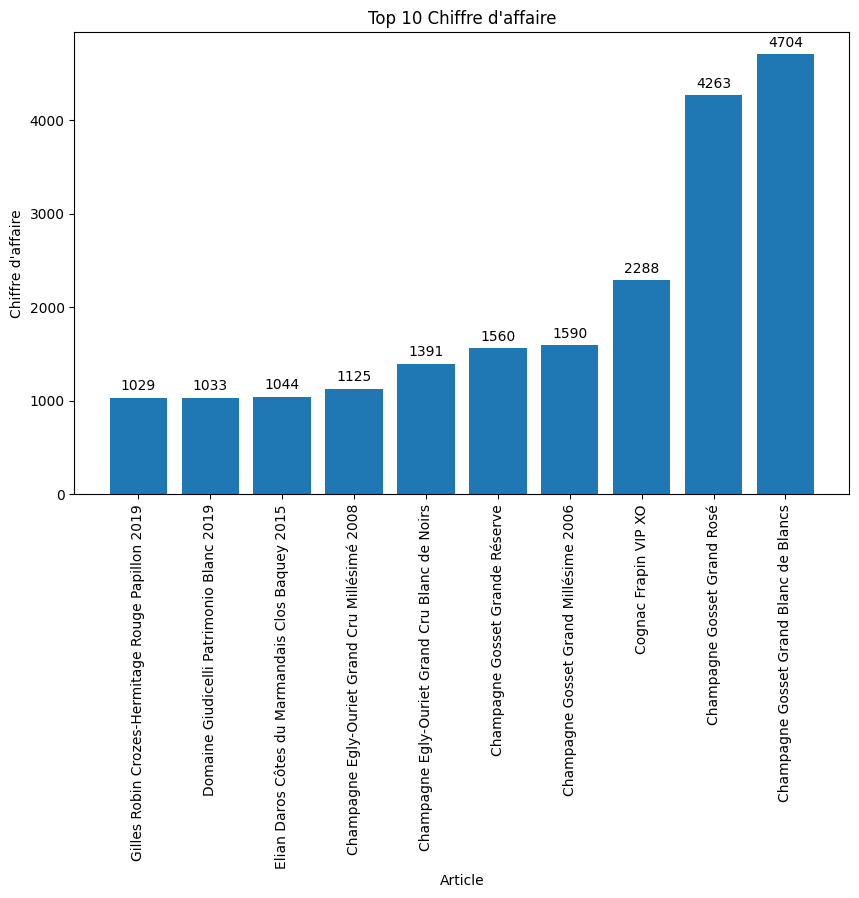

In [42]:
#affichage des 10 articles ayant le plus gros chiffre d'affaire
top10_ca = web_erp_chiffre_affaire.tail(10)
top10_ca.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
ax = plt.bar(top10_ca['post_title'], top10_ca['chiffre_affaire'])
for p in ax.patches:
   height = p.get_height()
   plt.text(p.get_x() + p.get_width() / 2., height + 50, '%d' % int(height), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('Article')
plt.ylabel("Chiffre d'affaire")
plt.title("Top 10 Chiffre d'affaire")
plt.show()


In [43]:
#creation d'une liste des articles ayant un chiffre d'affaire nul
article_ca_null= web_erp_chiffre_affaire[web_erp_chiffre_affaire['chiffre_affaire']==0]
# export des articles ayant un chiffre d'affaire nul pouvant être exploité part l'équipe marketing
article_ca_null.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/articles_vente_nulle.xlsx')
article_ca_null

,chiffre_affaire
post_title,
Thierry Germain Saumur-Champigny La Marginale 2016,0.0
Domaine de Vaccelli AOP Ajaccio Rouge Granit 174 2017,0.0
Domaine de Montgilet Vin de France Grolleau 2019,0.0
Domaine de Montgilet Coteaux de l'Aubance Les Trois Schistes 2016,0.0
Domaine de Montgilet Anjou Blanc 2016,0.0
...,...
Zind-Humbrecht Riesling Clos Windsbuhl 2014,0.0
Château de Villeneuve Saumur-Champigny Clos de la Bienboire 2018,0.0
Zind-Humbrecht Pinot Gris Roche Calcaire 2017,0.0


In [44]:
#liste des articles ayant un stock null
colonne = ['sku_x', 'total_sales', 'post_title', 'post_modified', 'product_id', 'price', 'stock_quantity','stock_status', 'chiffre_affaire']
article_outofstock= web_erp2[web_erp2['stock_quantity']==0]
article_outofstock = article_outofstock[colonne]
article_outofstock.sort_values('chiffre_affaire', inplace=True)
# Export des articles avec un stock nul dans un fichier excel pouvant être exploité par le service des achats
article_outofstock.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/articles_stock_nul.xlsx')

##**Chiffre d'affaire total**

In [45]:
chiffre_affaire_total = web_erp2['chiffre_affaire'].sum()
print("Le chiffre d'affaire totale est de", chiffre_affaire_total, "Euro" )

Le chiffre d'affaire totale est de 70568.6 Euro


# Recherche des valeurs aberrantes sur le prix

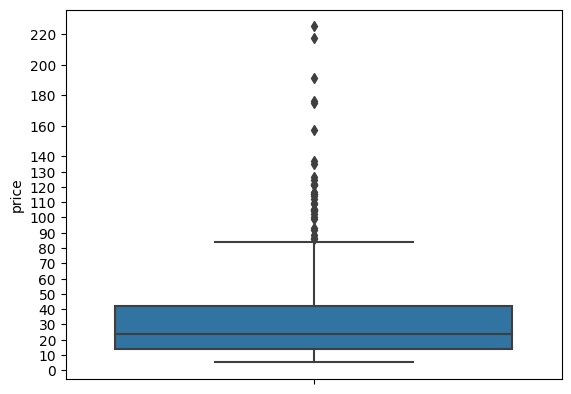

In [46]:
# recherche des valeurs aberrantes sur le prix
sns.boxplot(data=web_erp2, y='price')
plt.yticks([0, 10,20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 160, 180, 200, 220])
plt.show()

Les articles ayant un prix de vente supérieur à 80 sont potentiellement un prix de vente abérrant

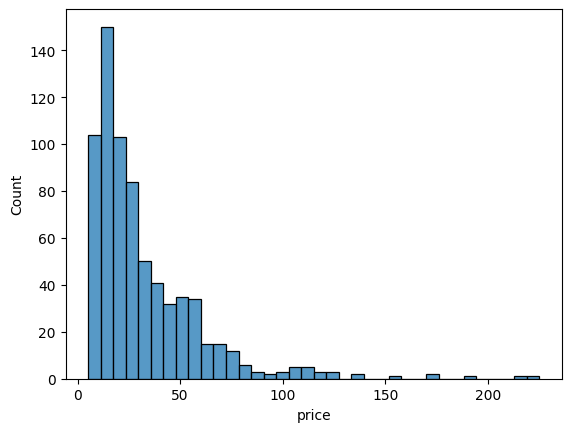

In [47]:
#affichage de l'histogramme de la répartition des prix
sns.histplot(web_erp2['price'])
plt.show()

In [48]:
#affichage des articles ayant un prix potentiellement aberrant(>80)
prix_aberrant = web_erp2[web_erp2['price'] > 80]
#export de la liste des potentiels abérrants car celle_ci doit être examiné par des experts étant donné qu'il est possible qu'il y ait des vins d'exceptions qui justifiraient un prix élevé
prix_aberrant.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 5/articles_avec_prix_abérrant.xlsx')
prix_aberrant


,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_modified,...,menu_order,post_type,comment_count,product_id,sku_y,onsale_web,price,stock_quantity,stock_status,chiffre_affaire
66,15382,0.0,0.0,taxable,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",2020-02-08 11:45:02,...,0.0,product,0.0,4115,15382,1,100.0,11,instock,0.0
68,11668,0.0,0.0,taxable,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,2020-02-20 09:55:02,...,0.0,product,0.0,4132,11668,1,88.4,5,instock,0.0
205,4679,0.0,0.0,taxable,2.0,2018-03-01 14:19:24,2018-03-01 13:19:24,Champagne Mailly Grand Cru Les Echansons 2007,<blockquote>Ce vin s'habille d'une parure fest...,2020-07-08 17:35:03,...,0.0,product,0.0,4337,4679,1,83.0,13,instock,0.0
208,15940,0.0,5.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,2020-03-07 11:18:45,...,0.0,product,0.0,4352,15940,1,225.0,0,outofstock,1125.0
210,12589,0.0,11.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,2020-08-13 10:15:02,...,0.0,product,0.0,4355,12589,1,126.5,2,instock,1391.5
214,13853,0.0,1.0,taxable,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,2019-12-23 09:30:11,...,0.0,product,0.0,4359,13853,1,85.6,0,outofstock,85.6
227,3510,0.0,13.0,taxable,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2020-08-22 11:35:03,...,0.0,product,0.0,4402,3510,1,176.0,8,instock,2288.0
228,3507,0.0,2.0,taxable,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",2020-08-12 09:30:16,...,0.0,product,0.0,4404,3507,1,108.5,2,instock,217.0
230,7819,0.0,0.0,taxable,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,2020-03-14 16:05:04,...,0.0,product,0.0,4406,7819,1,157.0,3,instock,0.0
231,3509,0.0,1.0,taxable,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,2020-07-04 09:45:03,...,0.0,product,0.0,4407,3509,1,104.0,6,instock,104.0


In [49]:
prix_aberrant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 66 to 712
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku_x              34 non-null     object        
 1   average_rating     34 non-null     float64       
 2   total_sales        34 non-null     float64       
 3   tax_status         34 non-null     object        
 4   post_author        34 non-null     float64       
 5   post_date          34 non-null     datetime64[ns]
 6   post_date_gmt      34 non-null     datetime64[ns]
 7   post_title         34 non-null     object        
 8   post_excerpt       34 non-null     object        
 9   post_modified      34 non-null     datetime64[ns]
 10  post_modified_gmt  34 non-null     datetime64[ns]
 11  post_parent        34 non-null     float64       
 12  guid               34 non-null     object        
 13  menu_order         34 non-null     float64       
 14  post_type 

In [50]:
# Vérification s'il y a des articles avec un prix négatif
prix_aberrant = web_erp[web_erp['price'] <0]
prix_aberrant[['post_title', 'price']]

,post_title,price


In [51]:
# Vérification s'il y a des articles avec un stock négatif
stock_aberrant = web_erp[web_erp['stock_quantity']<0]
prix_aberrant[['post_title', 'stock_quantity']]

,post_title,stock_quantity


Il n'y a pas d'article dont le prix est négatif ou ayant un stock négatif

**Résumé des abérrations trouvées :**

Dans ERP, le product_id 4954 à le status instock et un stock quantity = 0.




Il y a des articles qui ont le status instock et qui ne sont pas en vente.

Il y a de nombreuses lignes ne contenant aucune donnée dans web

Il y a de nombreuses colonnes totalement vide et donc non utilisées dans WEB  

Il y a 2 articles dans web qui n'ont pas de sku. Ils ont été supprimés car ils n'ont jamais été vendus

Il y a 2 articles dans web qui contiennent un tiret (13427-1) : C'est articles ont aussi été supprimés car ils n'ont jamais été vendus

La table liaison est inutile car le product_id est contenu dans les 4 derniers chiffres de GUID (voir vérification à la fin du code)

#Vérification rapide du calcul du chiffre d'affaire en faisant une fusion liaison et erp puis en faisant une liaison du résultat avec web_prod


In [52]:
#web_prod_liaison['product_id']=web_prod_liaison['product_id'].astype(int)
liaison_erp = pd.merge(liaison, erp,how='right', on='product_id')
liaison_erp

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock
821,7204,NaN,0,45.0,9,instock
822,7247,13127-1,1,54.8,23,instock
823,7329,14680-1,0,26.5,14,instock


> Utilisation d'un right ici pour la liaison car on veut être sur que toutes les données de l'ERP soient prises dans la liaison. Les masters datas de l'ERP doivent être la référence et maintenue par l'entreprise.



In [53]:
liaison_erp.shape

(825, 6)

In [54]:
liaison_erp_webprod = pd.merge(liaison_erp, web_prod,how='left', on='sku')
liaison_erp_webprod.shape

(825, 23)

In [55]:
#création de la colonne chiffre d'affaire
liaison_erp_webprod['total_sales'] = liaison_erp_webprod['total_sales'].astype(float)
liaison_erp_webprod['price'] = liaison_erp_webprod['price'].astype(float)
liaison_erp_webprod['chiffre_affaire'] = liaison_erp_webprod['total_sales'] * liaison_erp_webprod['price']

In [56]:
chiffre_affaire_total = liaison_erp_webprod['chiffre_affaire'].sum()
print("Le chiffre d'affaire totale est de", chiffre_affaire_total, "Euro" )

Le chiffre d'affaire totale est de 70568.6 Euro


In [57]:
liaison_erp_webprod

,product_id_x,sku,onsale_web,price,stock_quantity,stock_status,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id_y,chiffre_affaire
0,3847,15298,1,24.2,0,outofstock,0.0,6.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3847.0,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3849.0,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3850.0,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,3.0,taxable,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4032.0,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4039.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7204,NaN,0,45.0,9,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7247,13127-1,1,54.8,23,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7329,14680-1,0,26.5,14,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
diff3 =liaison_erp_webprod[liaison_erp_webprod['sku'].isna()]
diff3

,product_id_x,sku,onsale_web,price,stock_quantity,stock_status,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id_y,chiffre_affaire
19,4055,NaN,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,4090,NaN,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,4092,NaN,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,4195,NaN,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,7196,NaN,0,31.0,55,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,7200,NaN,0,31.0,6,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,7201,NaN,0,31.0,18,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


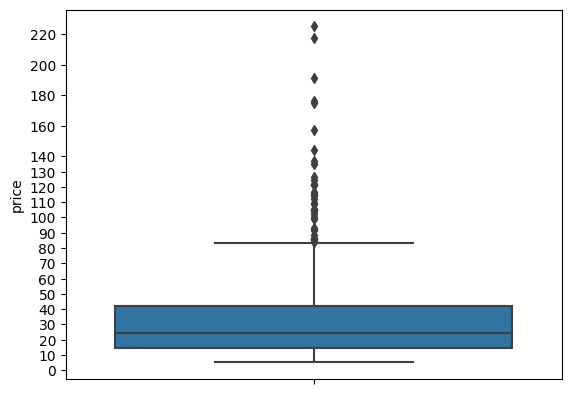

In [59]:
sns.boxplot(data=liaison_erp_webprod, y='price')
plt.yticks([0, 10,20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 160, 180, 200, 220])
plt.show()

La boite à moustache semmble identique à celle de la première méthode

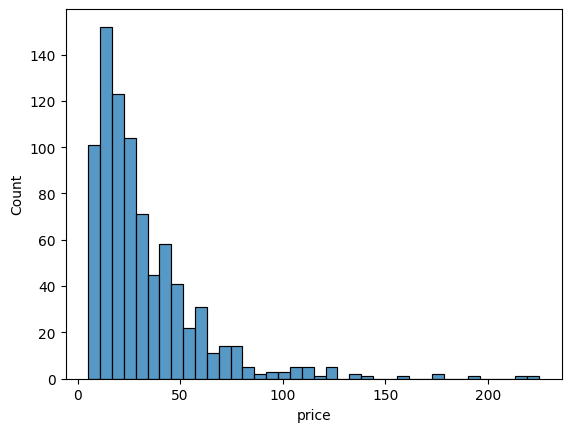

In [60]:
sns.histplot(liaison_erp_webprod['price'])
plt.show()

On ne retrouve pas le même histogramme que dans la première méthode. Mais liaison_web_prod contient encore des NaN. Supprimons les et examinons l'histogramme obtenue

In [61]:
liaison_erp_webprod

,product_id_x,sku,onsale_web,price,stock_quantity,stock_status,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id_y,chiffre_affaire
0,3847,15298,1,24.2,0,outofstock,0.0,6.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3847.0,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3849.0,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3850.0,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,3.0,taxable,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4032.0,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4039.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7204,NaN,0,45.0,9,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7247,13127-1,1,54.8,23,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7329,14680-1,0,26.5,14,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
liaison_erp_webprod.dropna(inplace=True)


In [63]:
liaison_erp_webprod

,product_id_x,sku,onsale_web,price,stock_quantity,stock_status,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,product_id_y,chiffre_affaire
0,3847,15298,1,24.2,0,outofstock,0.0,6.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3847.0,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3849.0,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,3850.0,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,3.0,taxable,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4032.0,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,taxable,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4039.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,6928,15741,1,19.0,20,instock,0.0,2.0,taxable,2.0,...,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,6928.0,38.0
787,6930,16135,1,8.4,83,instock,0.0,5.0,taxable,2.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,6930.0,42.0
792,7023,15891,1,27.5,15,instock,0.0,0.0,taxable,2.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,7023.0,0.0
793,7025,15887,1,69.0,2,instock,0.0,0.0,taxable,2.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,7025.0,0.0


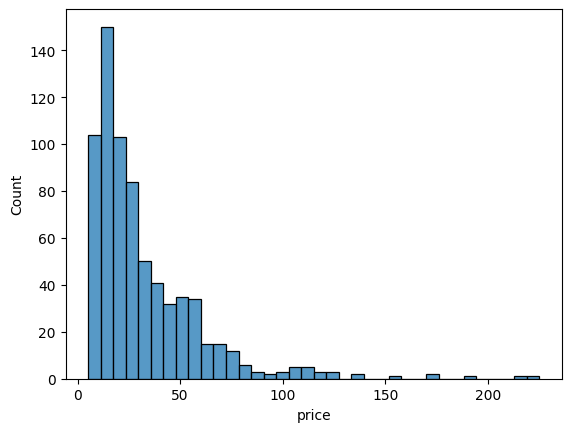

In [64]:
sns.histplot(liaison_erp_webprod['price'])
plt.show()

On retrouve bien l'histogramme de la 1ere methode.

# Verification de la possibilité d'effectuer une liaison direct entre Web_prod et ERP

In [65]:
#essai fusion direct web_prod et erp via le produc_id généré à partir du guid
web_erp_direct = pd.merge(web_prod, erp, how='right', on='product_id')
web_erp_direct.dropna(inplace=True)
web_erp_direct.shape

(713, 22)

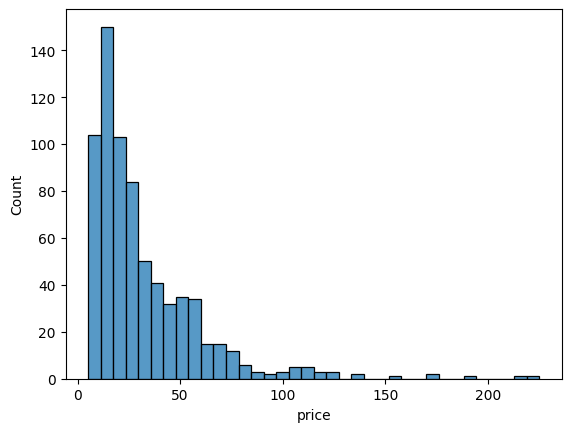

In [66]:
# histogramme de Web_erp_direct (fusion directe entre web_prod et ERP sans utiliser liaison)
# la fusion entre web-prod et ERP  a été faite plus haut dans le code
sns.histplot(web_erp_direct['price'])
plt.show()

On obtient le même histogramme que la première méthode ce qui montre que la table liaison est inutile et qu'il est possible de lier directement web_prod et ERP en utilisant les 4 derniers chiffres de la colonne GUID qui sont en faite le product_id

In [67]:
# Recherche des colonnes communes et des colonnes uniques pour web_erp_direct et liaison_erp_webprod
columns_web_erp_direct = web_erp_direct.columns.tolist()
columns_liaison_erp_webprod = liaison_erp_webprod.columns.tolist()

# Comparaison des noms de colonnes
common_columns = set(columns_web_erp_direct) & set(columns_liaison_erp_webprod)
colonnes_seulement_dans_web_erp_direct = set(columns_web_erp_direct) - set(columns_liaison_erp_webprod)
colonnes_seulement_liaison_erp_webprod = set(columns_liaison_erp_webprod) - set(columns_web_erp_direct)

print("Colonnes communes : ", common_columns)
print("Colonnes uniquement dans web_erp_direct : ", colonnes_seulement_dans_web_erp_direct)
print("Colonnes uniquement dans liaison_erp_webprod : ", colonnes_seulement_liaison_erp_webprod)



Colonnes communes :  {'post_modified', 'post_date', 'menu_order', 'tax_status', 'post_excerpt', 'post_author', 'stock_status', 'post_type', 'post_date_gmt', 'price', 'post_parent', 'sku', 'comment_count', 'average_rating', 'onsale_web', 'stock_quantity', 'post_title', 'guid', 'post_name', 'post_modified_gmt', 'total_sales'}
Colonnes uniquement dans web_erp_direct :  {'product_id'}
Colonnes uniquement dans liaison_erp_webprod :  {'chiffre_affaire', 'product_id_y', 'product_id_x'}


In [68]:
# Recherche des colonnes communes et des colonnes uniques pour web_erp2 et web_erp_direct
columns_web_erp2 = web_erp2.columns.tolist()
columns_web_erp_direct = web_erp_direct.columns.tolist()

# Comparaison des noms de colonnes
common_columns = set(columns_web_erp2) & set(columns_web_erp_direct)
colonnes_seulement_dans_web_erp2 = set(columns_web_erp2) - set(columns_web_erp_direct)
colonnes_seulement_dans_web_erp_direct = set(columns_web_erp_direct) - set(columns_web_erp2)

print("Colonnes communes : ", common_columns)
print("Colonnes uniquement dans web_er2 : ", colonnes_seulement_dans_web_erp2)
print("Colonnes uniquement dans web_erp_direct : ", colonnes_seulement_dans_web_erp_direct)

Colonnes communes :  {'post_modified', 'post_date', 'menu_order', 'tax_status', 'post_excerpt', 'post_author', 'stock_status', 'post_type', 'post_date_gmt', 'price', 'post_parent', 'product_id', 'comment_count', 'average_rating', 'onsale_web', 'stock_quantity', 'post_title', 'guid', 'post_modified_gmt', 'total_sales'}
Colonnes uniquement dans web_er2 :  {'chiffre_affaire', 'sku_y', 'sku_x'}
Colonnes uniquement dans web_erp_direct :  {'post_name', 'sku'}


In [69]:
#recherche des différences entre web_erp_direct et liaison_erp_webprod
diff_weberpdirect_liaison_erp_webprod = web_erp_direct[~web_erp_direct['product_id'].isin(liaison_erp_webprod['product_id_x'])]
diff_weberpdirect_liaison_erp_webprod

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,...,post_parent,guid,menu_order,post_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status


In [70]:
diff_weberpdirect_liaison_erp_webprod = web_erp_direct[~web_erp_direct['product_id'].isin(liaison_erp_webprod['product_id_y'])]
diff_weberpdirect_liaison_erp_webprod

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,...,post_parent,guid,menu_order,post_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status


Il n'y a pas de difference si on fait une liaison direct entre web et erp (via la création d'une colonne contenant les 4 derniers caractères de guid) et en fusionnant liaison et erp puis avec webprod.

In [71]:
#recherche des différences entre web_erp2 (fusion webprod avec liaison puis avec epr) et web_erp_direct
diff_weberp2_web_erp_direct=web_erp2[~web_erp2['sku_x'].isin(web_erp_direct['sku'])]
diff_weberp2_web_erp_direct

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_modified,...,menu_order,post_type,comment_count,product_id,sku_y,onsale_web,price,stock_quantity,stock_status,chiffre_affaire


Il n'y a pas de difference si on fait une liaison direct entre web_erp2 (fusion web et liaison puis avec erp) et en fusionnant directement web et erp.

In [72]:
diff_weberp2_web_erp_direct=web_erp2[~web_erp2['sku_y'].isin(web_erp_direct['sku'])]
diff_weberp2_web_erp_direct

,sku_x,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_modified,...,menu_order,post_type,comment_count,product_id,sku_y,onsale_web,price,stock_quantity,stock_status,chiffre_affaire
